In [63]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [64]:
LIBS_ANALYZED = [
    {
        'name': 'guava',
        'versions': {
            'v33.0': '2023-12-18',
            'v32.0': '2023-05-26',
            'v31.0': '2021-09-24',
            'v30.0': '2020-10-16',
            'v29.0': '2020-04-13',
            'v28.0': '2019-06-11',
            'v27.0': '2018-10-18',
            'v26.0': '2018-08-01',
            'v25.0': '2018-04-25',
            'v24.0': '2018-02-01',
            'v23.0': '2017-08-04',
            'v22.0': '2017-05-22',
            'v21.0': '2017-01-12',
            'v20.0': '2016-10-28',
            'v19.0': '2015-12-09',
            'v18.0': '2014-08-25',
            'v17.0': '2014-04-22',
            'v16.0': '2014-01-17',
            'v15.0': '2013-09-06',
            'v14.0': '2013-02-25',
            'v13.0': '2012-08-02',
            'v12.0': '2012-04-30',
            'v11.0': '2011-12-17',
            'v10.0': '2011-09-27',
        }
    },
    {
        'name': 'commons-lang',
        'versions': {
            'v3.17': '2024-08-29',
            'v3.16': '2024-08-07',
            'v3.15': '2024-07-17',
            'v3.14': '2023-11-22',
            'v3.13': '2023-07-28',
            'v3.12': '2021-03-01',
            'v3.11': '2020-07-16',
            'v3.10': '2020-03-27',
            'v3.9': '2019-04-15',
            'v3.8': '2018-08-19',
            'v3.7': '2017-11-08',
            'v3.6': '2017-06-12',
            'v3.5': '2016-10-20',
            'v3.4': '2015-04-06',
            'v3.3': '2014-03-04',
            'v3.2': '2014-01-01',
            'v3.1': '2011-11-15',
            'v3.0': '2011-07-19',
            'v2.6': '2011-01-16',
            'v2.5': '2010-04-07',
            'v2.4': '2008-03-19',
            'v2.3': '2007-07-29',
        }
    },
    {
        'name': 'h2database',
        'versions': {
            'v2.0.232': '2024-08-10',
            'v2.0.230': '2024-07-15',
            'v2.0.224': '2023-09-17',
            'v2.0.222': '2023-08-23',
            'v2.0.220': '2023-07-04',
            'v2.0.214': '2022-06-14',
            'v2.0.212': '2022-04-09',
            'v2.0.210': '2022-01-17',
            'v2.0.206': '2022-01-04',
            'v2.0.204': '2021-12-21',
            'v2.0.202': '2021-11-26',
            'v1.4.200': '2019-10-14',
            'v1.4.199': '2019-03-13',
            'v1.4.198': '2019-02-22',
            'v1.4.197': '2018-03-18',
            'v1.4.196': '2017-06-10',
            'v1.4.195': '2017-04-23',
            'v1.4.194': '2017-03-10',
            'v1.4.193': '2016-10-31',
            'v1.4.192': '2016-05-26',
            'v1.4.191': '2016-01-21',
            'v1.4.190': '2015-10-11',
            'v1.4.188': '2015-08-01',
        }
    },
    {
        'name': 'jackson-databind',
        'versions': {
            'v2.18': '2024-09-27',
            'v2.17': '2024-03-12',
            'v2.16': '2023-11-15',
            'v2.15': '2023-04-23',
            'v2.14': '2022-11-05',
            'v2.13': '2021-09-30',
            'v2.12': '2020-11-29',
            'v2.11': '2020-04-26',
            'v2.10': '2019-09-26',
            'v2.9': '2017-07-30',
            'v2.8': '2016-07-04',
            'v2.7': '2016-01-10',
            'v2.6': '2015-07-19',
            'v2.5': '2015-01-02',
            'v2.4': '2014-06-03',
            'v2.3': '2013-11-14',
            'v2.2': '2013-04-23',
            'v2.1': '2012-10-10',
        }
    },
    {
        'name': 'roseau',
        'versions': {
            'v0.0.3': '2024-07-17',
            'v0.0.2': '2024-02-14',
            'v0.0.1': '2023-09-20',
        }
    },
    {
        'name': 'commons-collections',
        'versions': {
            'v4.5-M3': '2024-12-18',
            'v4.4': '2019-07-09',
            'v4.3': '2019-02-05',
        }
    },
    {
        'name': 'log4j-core',
        'versions': {
            'v2.24': '2024-09-03',
            'v2.23': '2024-02-17',
            'v2.22': '2023-11-20',
            'v2.21': '2023-10-16',
            'v2.20': '2023-02-21',
            'v2.19': '2022-09-17',
            'v2.18': '2022-09-09',
            'v2.17': '2021-12-18',
            'v2.16': '2021-12-13',
        }
    }
]

In [74]:
def process_lib(lib):
    name = lib['name']
    if not os.path.exists(f'{name}.csv'):
        print(f'File {name}.csv not found.')
        return

    df = pd.read_csv(f'{name}.csv', sep='|')

    # Convert date to datetime format
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, utc=True, errors='raise')

    # Drop rows where date could not be parsed
    df = df.dropna(subset=['date'])

    # Convert numeric columns
    df[['typesCount', 'methodsCount', 'fieldsCount', 'breakingChangesCount', 'deprecatedAnnotationsCount', 'betaAnnotationsCount', 'internalTypesCount']] = df[['typesCount', 'methodsCount', 'fieldsCount', 'breakingChangesCount', 'deprecatedAnnotationsCount', 'betaAnnotationsCount', 'internalTypesCount']].apply(pd.to_numeric)

    # Versions and their release dates
    versions = lib['versions']
    version_dates = {k: pd.to_datetime(v) for k, v in versions.items()}

    # Summary statistics
    print('Basic Statistics:')
    print(df.describe())

    # Combined plot for API size and breaking changes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot API size evolution
    ax1.set_xlabel('Date')
    ax1.set_ylabel('API Size', color='tab:blue')
    ax1.plot(df['date'], df['typesCount'], label='API Types', color='tab:blue')
    ax1.plot(df['date'], df['methodsCount'], label='API Methods', color='tab:green')
    ax1.plot(df['date'], df['fieldsCount'], label='API Fields', color='tab:orange')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Create second y-axis for breaking changes
    ax2 = ax1.twinx()
    ax2.set_ylabel('Breaking Changes', color='tab:red')
    sns.lineplot(x='date', y='breakingChangesCount', data=df, color='tab:red', ax=ax2)
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(['Breaking Changes'], loc='center right')

    # Add version release dates as vertical lines
    for version, vdate in version_dates.items():
        ax1.axvline(vdate, color='gray', linestyle='--', alpha=0.6)
        ax1.text(vdate, ax1.get_ylim()[1] * 0.9, version, rotation=90, verticalalignment='top', fontsize=9, color='gray')

    plt.title(f'Evolution of {name} API Size and Breaking Changes Over Time')
    plt.xticks(rotation=45)
    plt.show()
    fig.savefig(f'{name}_api_size.pdf')

    # Combined plot for API size and breaking changes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot API size evolution
    ax1.set_xlabel('Date')
    ax1.set_ylabel('API Size', color='tab:blue')
    ax1.plot(df['date'], df['deprecatedAnnotationsCount'], label='@Deprecated Annotations', color='tab:blue')
    ax1.plot(df['date'], df['betaAnnotationsCount'], label='@Beta Annotations', color='tab:green')
    ax1.plot(df['date'], df['internalTypesCount'], label='Internal Types', color='tab:orange')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Create second y-axis for breaking changes
    ax2 = ax1.twinx()
    ax2.set_ylabel('Breaking Changes', color='tab:red')
    sns.lineplot(x='date', y='breakingChangesCount', data=df, color='tab:red', ax=ax2)
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(['Breaking Changes'], loc='center right')

    # Add version release dates as vertical lines
    for version, vdate in version_dates.items():
        ax1.axvline(vdate, color='gray', linestyle='--', alpha=0.6)
        ax1.text(vdate, ax1.get_ylim()[1] * 0.9, version, rotation=90, verticalalignment='top', fontsize=9, color='gray')

    plt.title(f'Evolution of {name} API Information and Breaking Changes Over Time')
    plt.xticks(rotation=45)
    plt.show()
    fig.savefig(f'{name}_api_information.pdf')

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount   typesCount  \
count        6627.000000        6627.000000        6627.000000  6627.000000   
mean            0.094160           0.040441           2.533122   377.179267   
std             0.679709           0.497983          14.309731    57.155777   
min             0.000000           0.000000           0.000000   206.000000   
25%             0.000000           0.000000           0.000000   351.000000   
50%             0.000000           0.000000           1.000000   390.000000   
75%             0.000000           0.000000           2.000000   415.000000   
max            17.000000          15.000000         572.000000   440.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count   6627.000000  6627.000000                 6627.000000   
mean    3452.294854   305.615211                  118.915950   
std      661.246285    81.659910                   52.124682   
min     1707.0

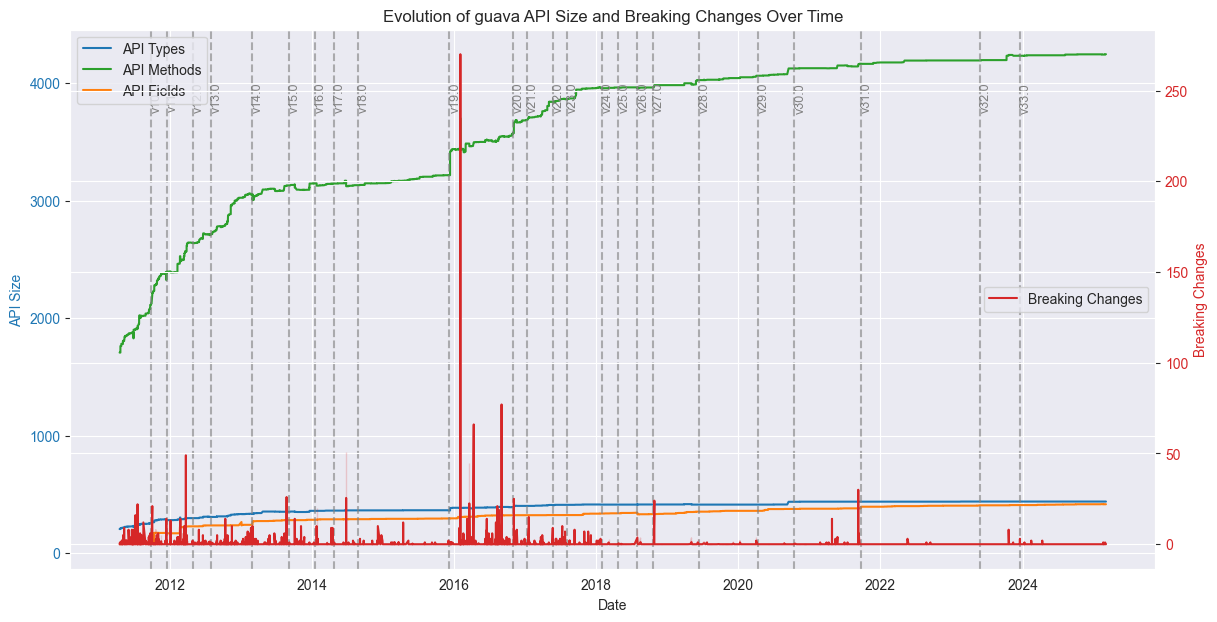

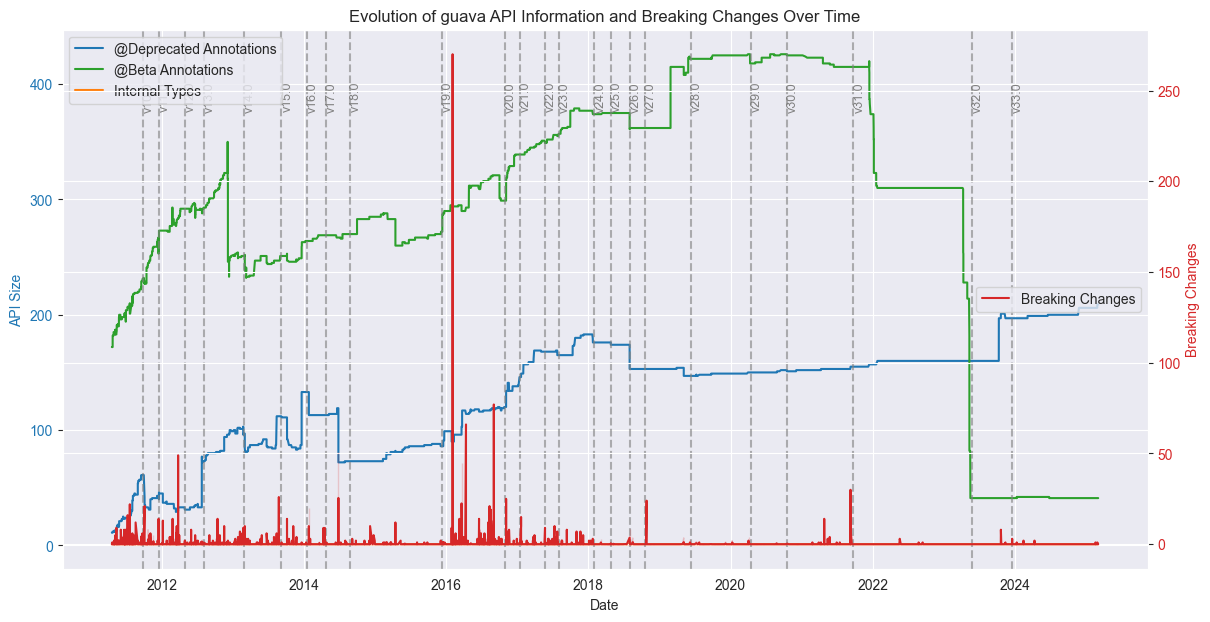

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount   typesCount  \
count        8409.000000        8409.000000        8409.000000  8409.000000   
mean            0.061006           0.034606           1.491022   145.925675   
std             1.010395           0.914970           7.388141    71.681188   
min             0.000000           0.000000           0.000000    13.000000   
25%             0.000000           0.000000           0.000000    80.000000   
50%             0.000000           0.000000           1.000000   123.000000   
75%             0.000000           0.000000           1.000000   224.000000   
max            79.000000          79.000000         154.000000   266.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count   8409.000000  8409.000000                 8409.000000   
mean    2161.641812   276.601855                   52.873469   
std      713.325234   119.185561                   59.190790   
min      157.0

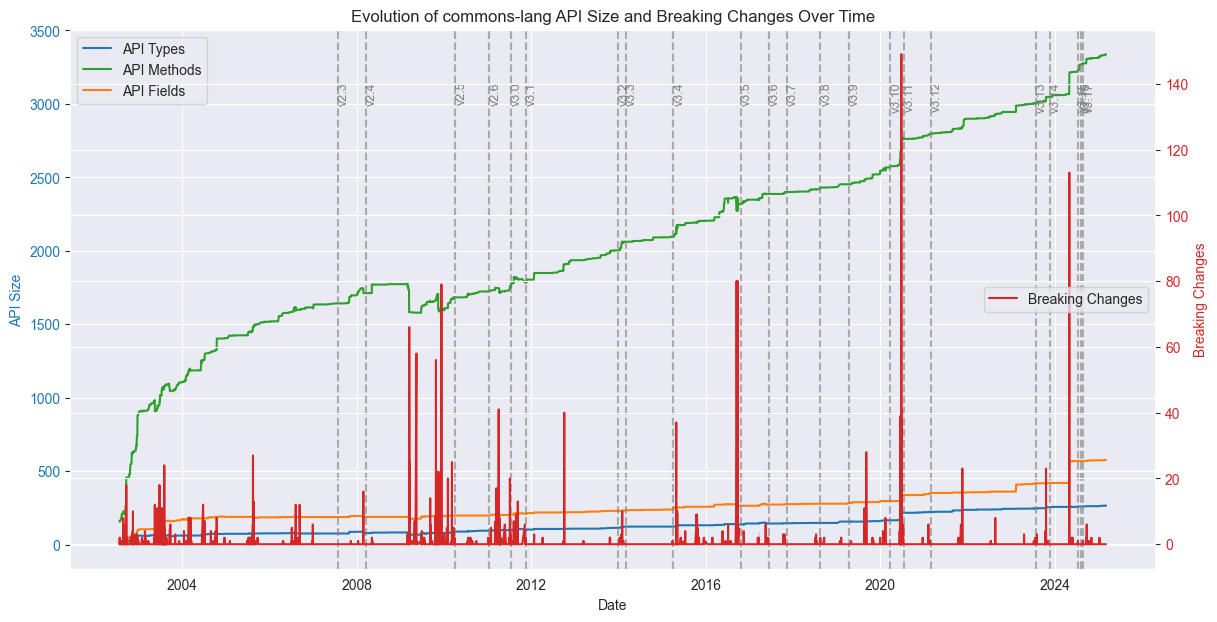

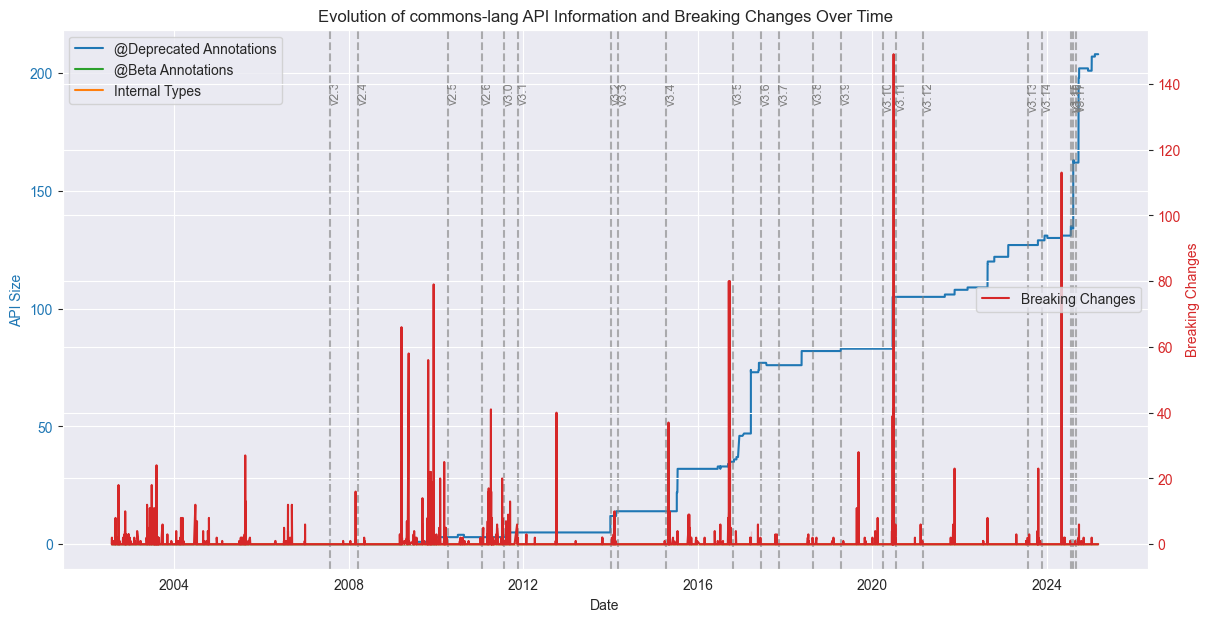

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount   typesCount  \
count        9094.000000        9094.000000        9094.000000  9094.000000   
mean            0.191885           0.159776           5.991203   617.438201   
std             1.802590           1.801024          29.623016   100.104738   
min             0.000000           0.000000           0.000000   470.000000   
25%             0.000000           0.000000           0.000000   525.000000   
50%             0.000000           0.000000           1.000000   621.000000   
75%             0.000000           0.000000           4.000000   690.000000   
max            98.000000          98.000000         780.000000   795.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count   9094.000000  9094.000000                 9094.000000   
mean    7273.045854  1515.127227                   11.573125   
std      590.387676   208.124265                    4.111833   
min     6190.0

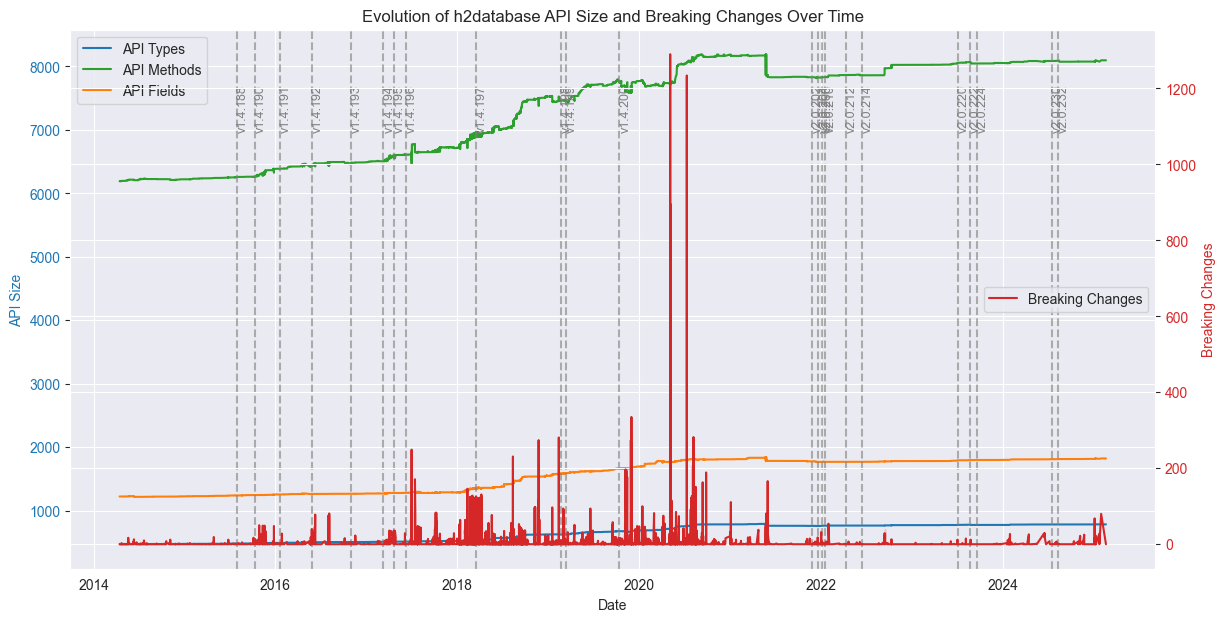

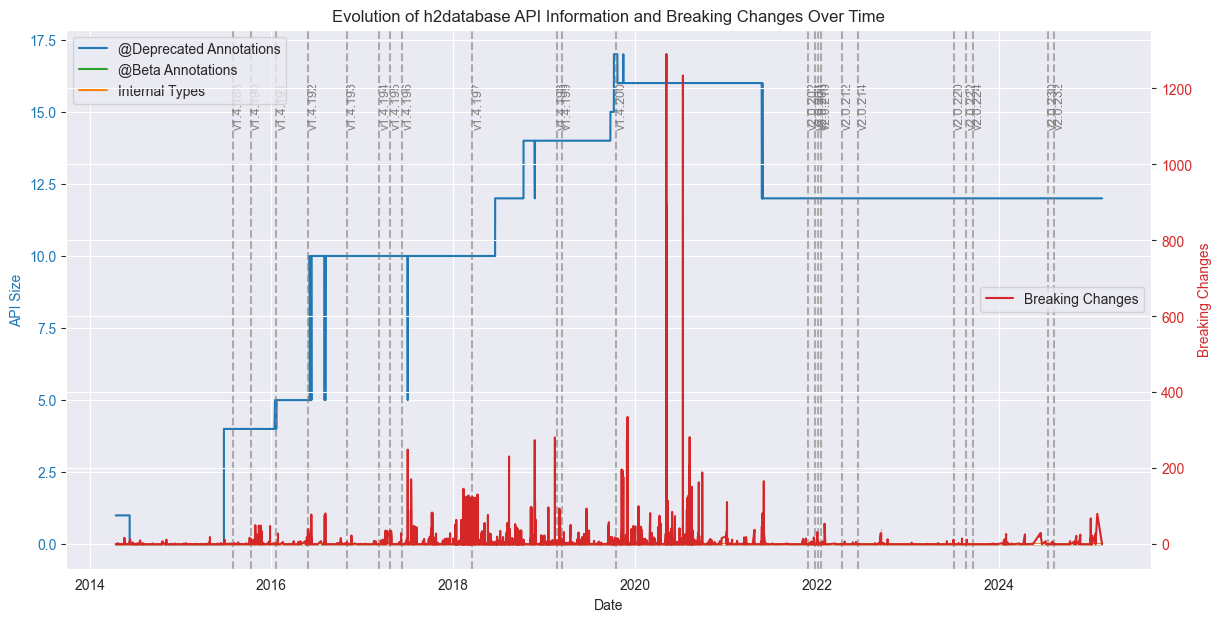

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount   typesCount  \
count        7846.000000        7846.000000        7846.000000  7846.000000   
mean            1.068570           1.047668          33.064491   517.333418   
std             3.541237           4.160302          66.059949    57.132558   
min             0.000000           0.000000           0.000000   396.000000   
25%             0.000000           0.000000           0.000000   476.000000   
50%             0.000000           0.000000           2.000000   510.000000   
75%             0.000000           0.000000          21.000000   574.750000   
max            52.000000          62.000000         364.000000   614.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count   7846.000000  7846.000000                 7846.000000   
mean    4254.811624   917.823604                  189.172572   
std      721.140968   163.054202                   85.857631   
min     2641.0

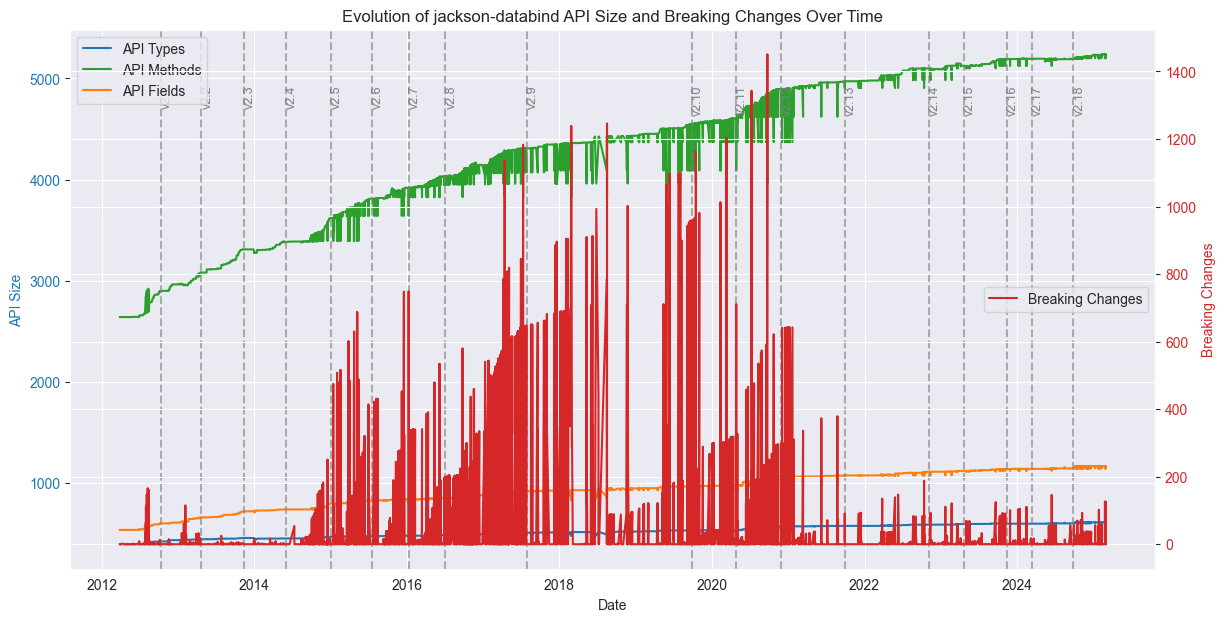

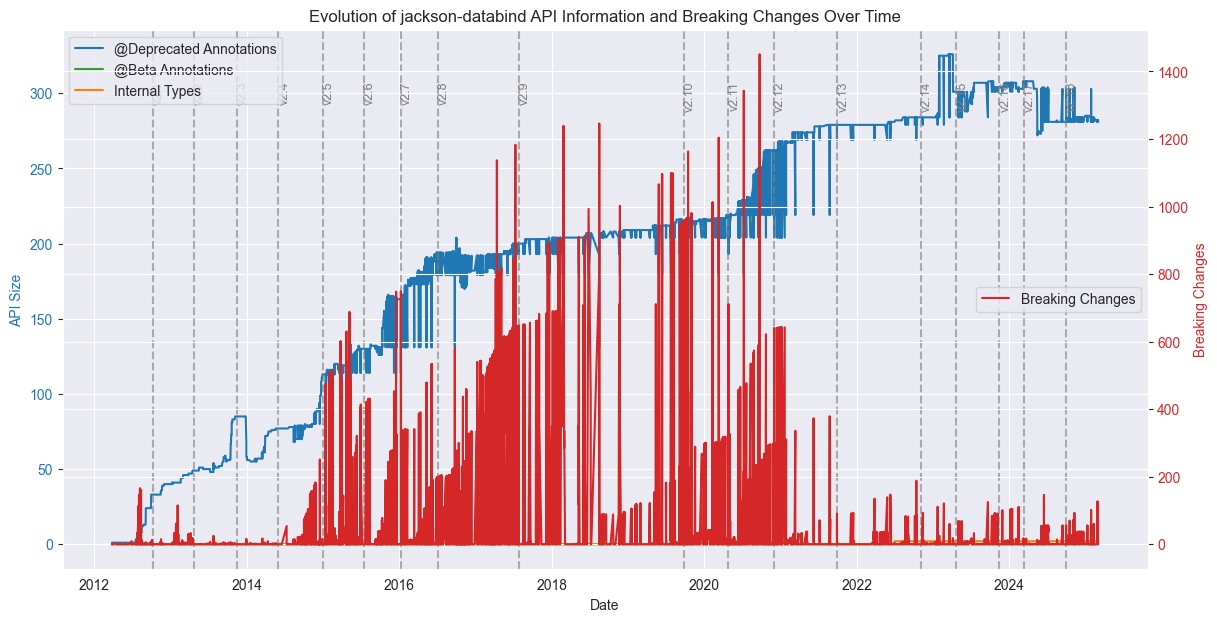

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount  typesCount  \
count         251.000000         251.000000         251.000000  251.000000   
mean            0.541833           0.354582           3.398406   40.972112   
std             2.159917           1.894669           5.104570    9.305225   
min             0.000000           0.000000           0.000000   16.000000   
25%             0.000000           0.000000           1.000000   38.000000   
50%             0.000000           0.000000           1.000000   42.000000   
75%             0.000000           0.000000           4.000000   47.000000   
max            26.000000          25.000000          32.000000   57.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count    251.000000   251.000000                       251.0   
mean     229.071713    62.820717                         0.0   
std       53.984617    10.952430                         0.0   
min       65.000000    

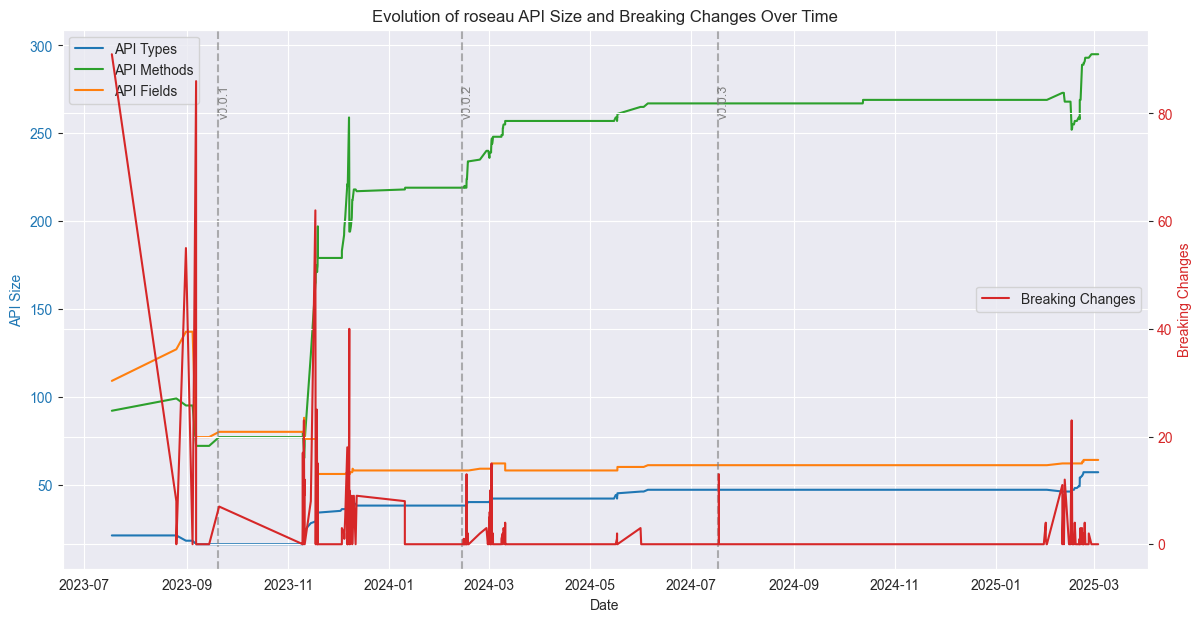

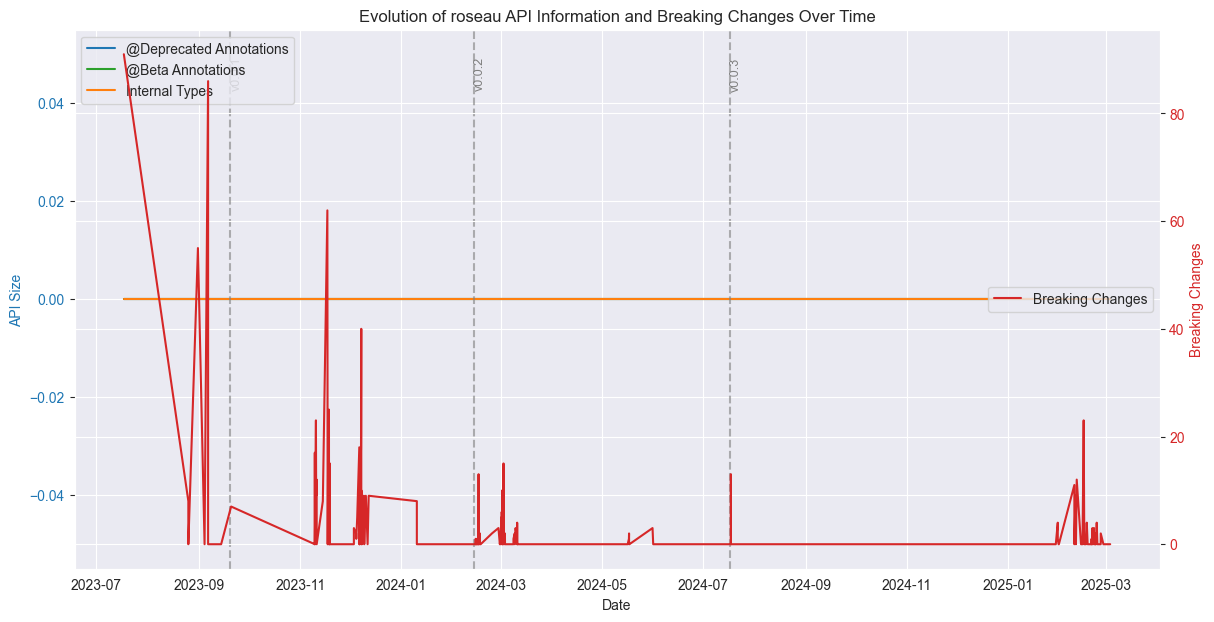

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount   typesCount  \
count        1782.000000        1782.000000        1782.000000  1782.000000   
mean            0.038721           0.019080           1.882716   380.026936   
std             0.533193           0.450436          11.176610    12.004929   
min             0.000000           0.000000           0.000000   352.000000   
25%             0.000000           0.000000           0.000000   374.000000   
50%             0.000000           0.000000           0.000000   381.000000   
75%             0.000000           0.000000           1.000000   388.000000   
max            17.000000          18.000000         257.000000   398.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count   1782.000000  1782.000000                 1782.000000   
mean    2960.459035   136.983165                   23.197531   
std      135.663360     9.286188                    3.626472   
min     2690.0

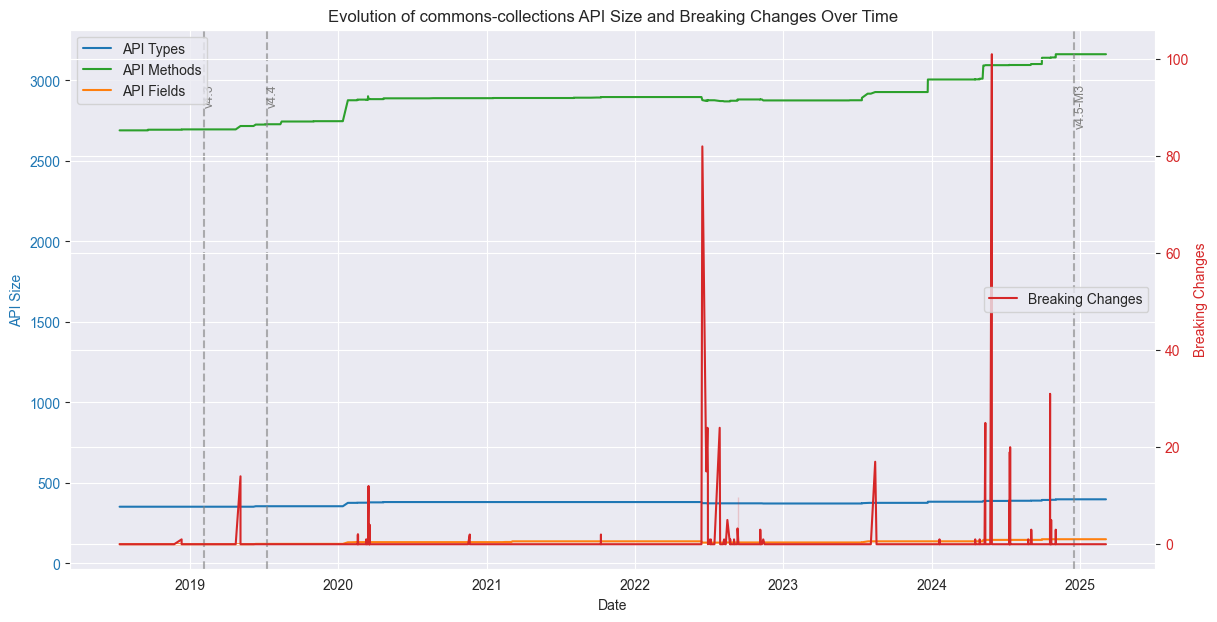

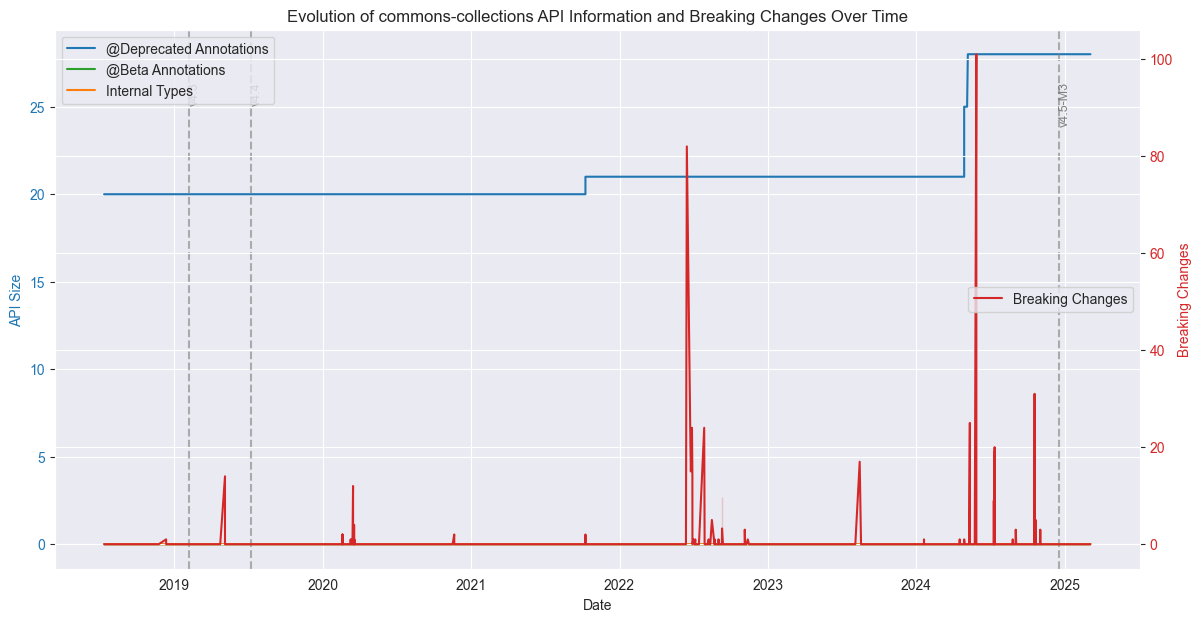

Basic Statistics:
       createdFilesCount  deletedFilesCount  updatedFilesCount   typesCount  \
count        3215.000000        3215.000000        3215.000000  3215.000000   
mean            0.058165           0.043857           1.338725   783.026750   
std             0.946964           0.918051          16.256482    13.879803   
min             0.000000           0.000000           0.000000   756.000000   
25%             0.000000           0.000000           0.000000   775.000000   
50%             0.000000           0.000000           0.000000   789.000000   
75%             0.000000           0.000000           0.000000   792.000000   
max            22.000000          22.000000         663.000000   807.000000   

       methodsCount  fieldsCount  deprecatedAnnotationsCount  \
count   3215.000000  3215.000000                 3215.000000   
mean    3742.163297   525.017418                  108.360809   
std       74.678588    24.028355                   14.833000   
min     3587.0

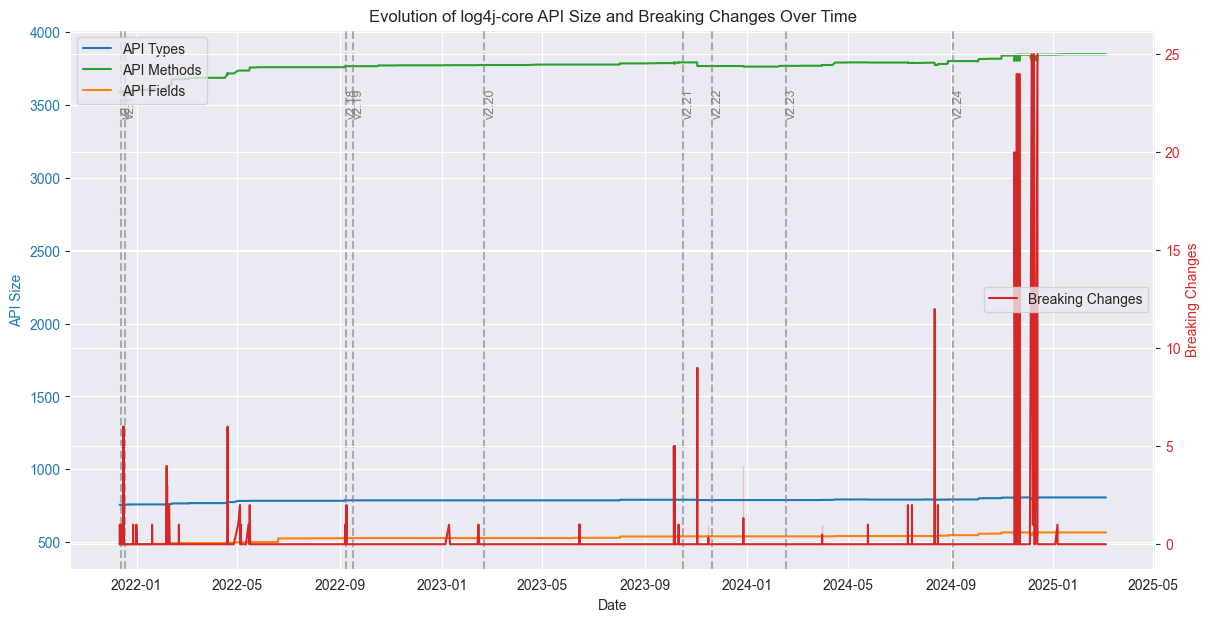

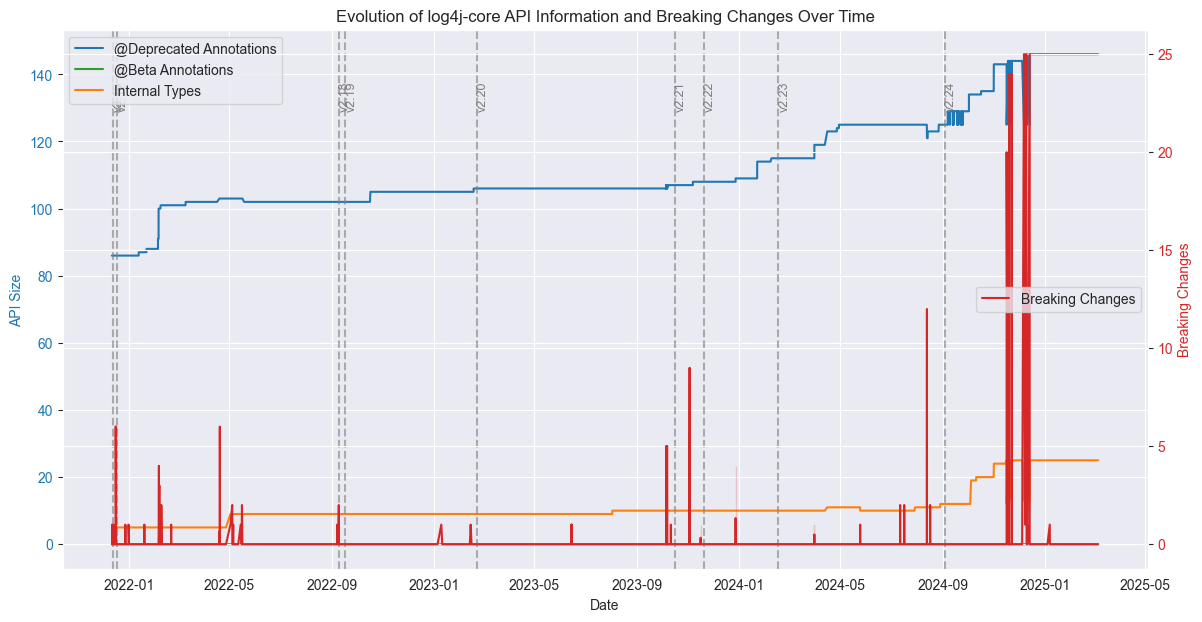

In [75]:
for lib_analyzed in LIBS_ANALYZED:
    process_lib(lib_analyzed)